### Dimentionality Reduction

#### Factor Analysis:
Factor analysis is a technique that is used to reduce a large number of variables into fewer numbers of factors. it includes relevant variables into analysis, and there is true correlation between variables and factors.

**Assumptions**: 

* No outlier: Assume that there are no outliers in data.
* Adequate sample size: The case must be greater than the factor.
* No perfect multicollinearity: Factor analysis is an interdependency technique.  There should not be perfect multicollinearity between the variables.
* Homoscedasticity: Since factor analysis is a linear function of measured variables, it does not require homoscedasticity between the variables.
* Linearity: Factor analysis is also based on linearity assumption.  Non-linear variables can also be used.  After transfer, however, it changes into linear variable.
* Interval Data: Interval data are assumed.

There are different types of methods used to extract the factor from the data set:
* Principal Component Analysis (Most prominent)
* Common Factor Analysis
* Image Factoring
* Maximum Likelyhood Method

In [55]:
import pandas as pd
import numpy as np
import sklearn
import seaborn
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()

In [11]:
X = iris.data
variable_names = iris.feature_names

In [24]:
pca = PCA()
iris_pca = pca.fit_transform(X)
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [25]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

NOTE: component 0 and 1 combinely 97.7% of total information

In [36]:
df = pd.DataFrame(pca.components_, columns=variable_names)

In [37]:
import seaborn as sb

<AxesSubplot:>

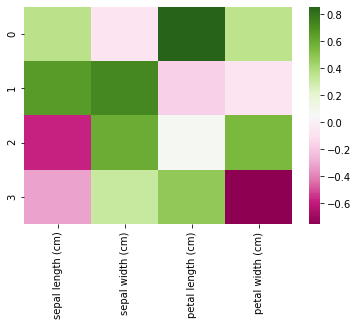

In [47]:
sb.heatmap(df, cmap='PiYG')

In [52]:
iris_df = pd.DataFrame(X, columns = variable_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


[]

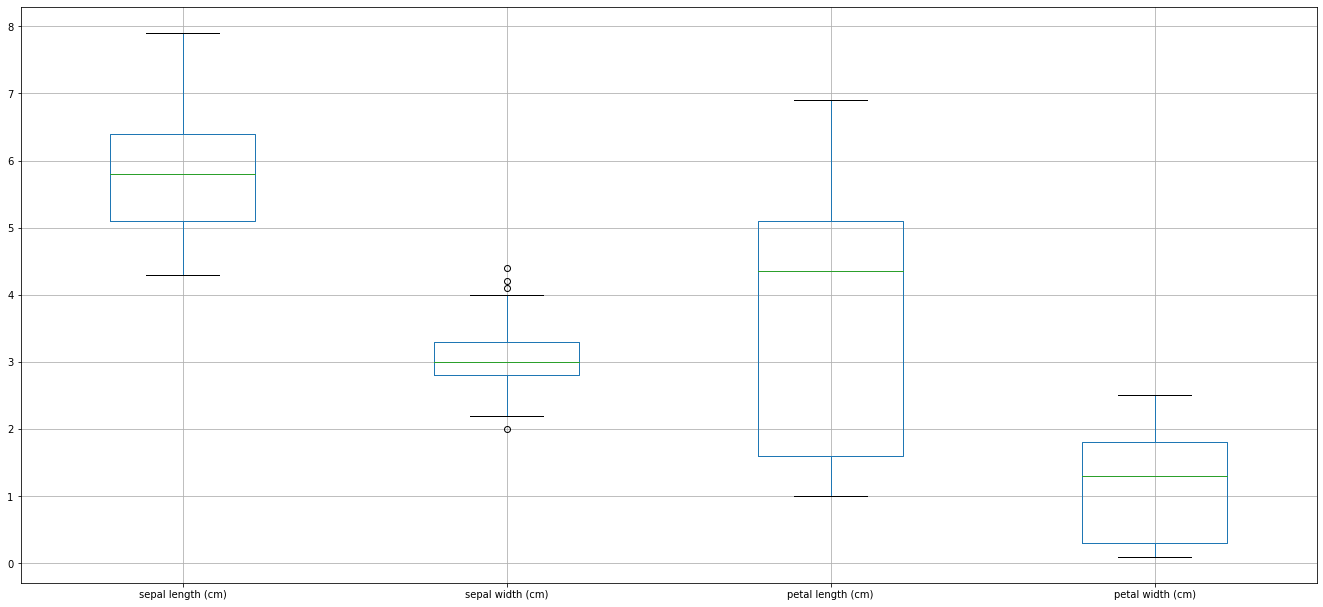

In [58]:
plt.figure().add_axes([.1,.1,3,2])
iris_df.boxplot()
plt.plot()

In [66]:
sepal_width = iris_df.iloc[:,1]
iris_outliers = np.bitwise_or(sepal_width > 4 , sepal_width < 2.05)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [85]:
iris_df = pd.read_csv('data/iris.csv')
iris_df = iris_df.iloc[:,1:]
sepal_width = iris_df.iloc[:,1]
iris_outliers = np.bitwise_or(sepal_width > 4 , sepal_width < 2.05)

iris_df=iris_df[~iris_outliers]

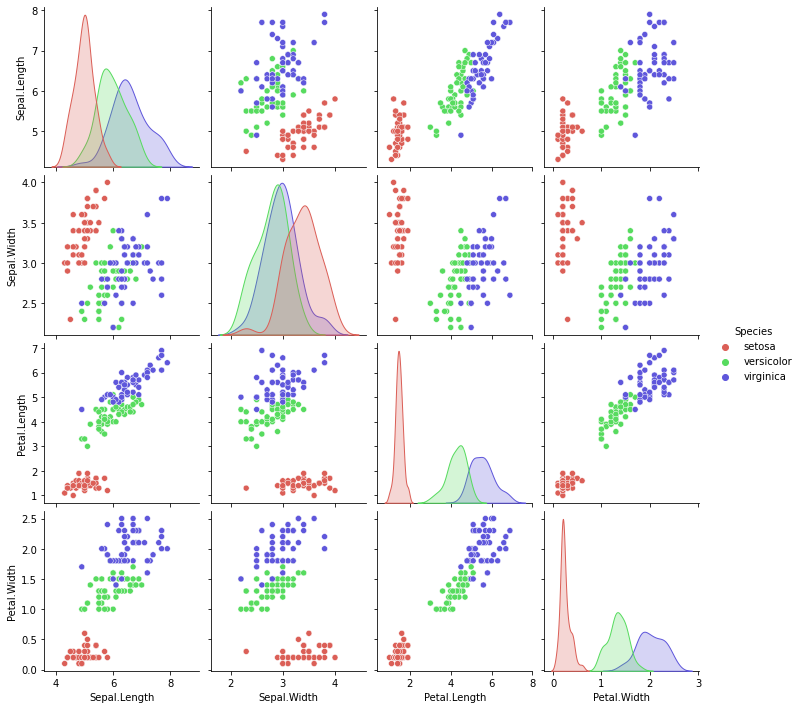

In [86]:
sb.pairplot(iris_df, hue="Species", palette='hls')

In [90]:
sepal_width = iris_df[['Sepal.Width','Species']]

In [91]:
petal_length = iris_df[['Petal.Length','Species']]

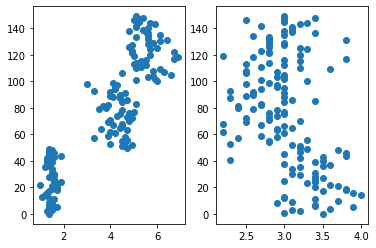

In [104]:
plt.subplot(1,2,1)
plt.scatter(petal_length['Petal.Length'].values, petal_length.index)
plt.subplot(1,2,2)
plt.scatter(sepal_width['Sepal.Width'].values, sepal_width.index)

In [100]:
sepal_width['Sepal.Width'].values

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. , 3.4,
       3.5, 3.4, 3.2, 3.1, 3.4, 3.1, 3.2, 3.5, 3.6, 3. , 3.4, 3.5, 2.3,
       3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8,
       2.8, 3.3, 2.4, 2.9, 2.7, 3. , 2.2, 2.9, 2.9, 3.1, 3. , 2.7, 2.2,
       2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. , 2.9, 2.6, 2.4, 2.4,
       2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6, 3. , 2.6, 2.3, 2.7,
       3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9, 3. , 3. , 2.5, 2.9,
       2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. , 3.8, 2.6, 2.2, 3.2,
       2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. , 2.8, 3.8, 2.8, 2.8,
       2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3. , 2.5,
       3. , 3.4, 3. ])

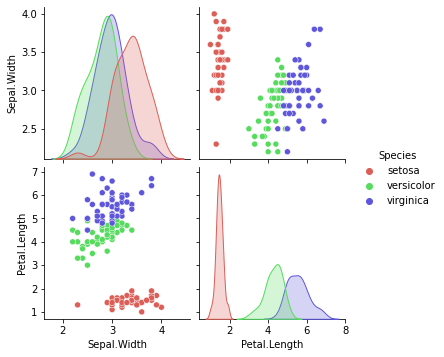

In [107]:
sb.pairplot(iris_df[['Sepal.Width','Petal.Length', 'Species']], hue='Species', palette='hls')